In [8]:
# %load correlation_with_memory_examples.py
#!/usr/bin/env python2
"""
Created on %(date)s

@author: %(username)s
"""
#.............................................
# INTITIAL SETUP
#.............................................

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import datasets, linear_model
#import matplotlib.mlab as mlab
#import scipy.signal as sig
#from scipy import stats
#import numpy.linalg as LA
#from scipy import interpolate
#import numpy.ma as ma
#import csv
#from numpy import genfromtxt
#from mpl_toolkits.basemap import Basemap

import general_functions as gf
reload(gf)


#scipy.linalg

<module 'general_functions' from '/Users/eabarnes/GoogleDrive/WORK/SOFTWARE/PYTHON/general_functions.pyc'>

# Brief Description of the following code
This is an example showing how autocorrelation (memory) in data can impact the correlations you compute.

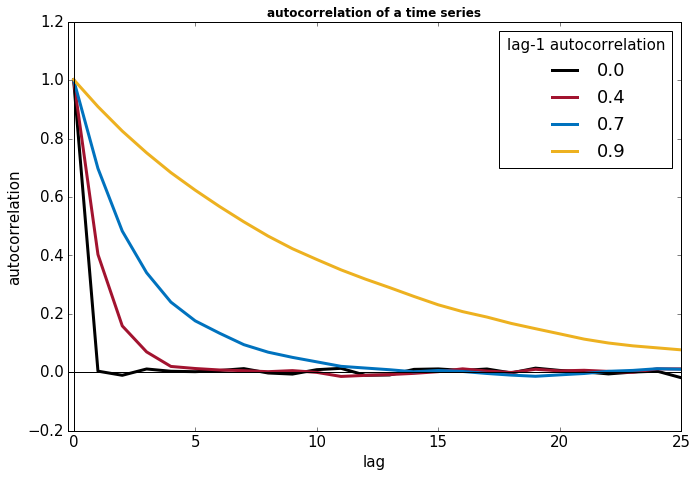

In [14]:
#%%
t = np.arange(0,10000,1.)
auto_vec = np.array([0, .4, .7, .9])

gf.cfig(1)
plt.show()

for ia,a in enumerate(auto_vec):

    x1 = np.empty((np.size(t),))
    
    b = np.sqrt(1. - a**2)
    x1[0] = np.random.normal(0.,1.,size=1)
    
    for it,tval in enumerate(t[1:]):
        x1[it+1] = a*x1[it] + b*np.random.normal(size=1)

    c = np.correlate(x1,x1, 'same')/(np.var(x1)*np.size(x1))
    c = c[np.size(c)/2:]    
    
    gf.fig(1)
    plt.plot(np.arange(0,np.size(c)),c,'-')
    plt.xlim(-.25,25)

gf.plot_zero_lines()    
plt.xlabel('lag')
plt.ylabel('autocorrelation')    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation')
plt.title('autocorrelation of a time series', fontsize = 12)
plt.show()

In [10]:
#%%
t = np.arange(0,1000,1)
auto_vec = np.array([0, .4, .7, .9])
CORR_VEC = np.empty((1000,np.size(auto_vec)))


for ia,a in enumerate(auto_vec):

    print 'a = ' + str(a)
    b = np.sqrt(1. - a**2)
    
    x = np.empty((np.size(t),))
    y = np.empty((np.size(t),))    
    
    for ic,cval in enumerate(CORR_VEC[:,0]):
        x[0] = np.random.normal(size=1)
        y[0] = np.random.normal(size=1)        

        for it,tval in enumerate(t[1:]):
            x[it+1] = a*x[it] + b*np.random.normal(size=1)
            y[it+1] = a*y[it] + b*np.random.normal(size=1)
            
        c = np.corrcoef(x,y)
        CORR_VEC[ic,ia] = c[0,1]
        #c = np.correlate(x1,x1, 'same')/(np.var(x1)*np.size(x1))
        #c = c[np.size(c)/2:]    

a = 0.0
a = 0.4
a = 0.7
a = 0.9


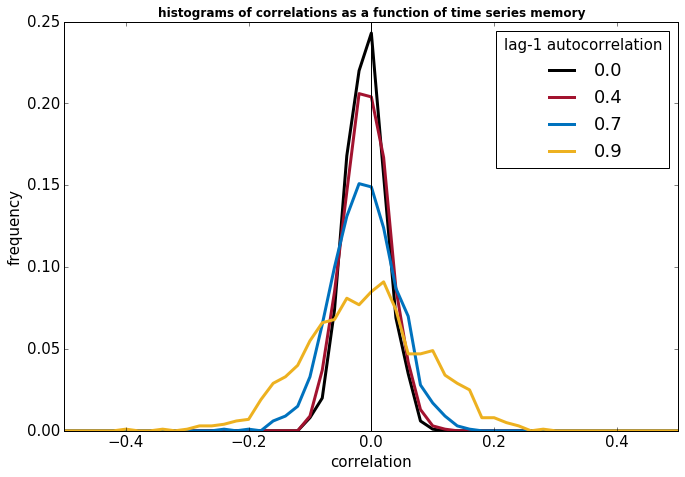

In [13]:
#%% plot results
xinc = np.arange(-1.,1.,0.02)

gf.cfig(2)

iplot = 0
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')

iplot = 1
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')

iplot = 2
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')

iplot = 3
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')

gf.plot_zero_lines()    
plt.xlabel('correlation')
plt.ylabel('frequency')    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation')
plt.title('histograms of correlations as a function of time series memory', fontsize = 12)
plt.xlim(-.5,.5)

plt.show()
               